## Binary Logistic Regression

### Autor: Antonio Castañares Rodríguez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

### Binary Logistic Regression

Logistic regression is a classification algorithm that applies linear regression to model the relationship between features and the probability of a certain outcome. However, since we need predictions in the range (0,1). In binary classification we use the sigmoid function (also called logistic function) to map any real-valued number to a probability.

The Sigmoid function is given by: 

$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

Where:
- $z=Xw$ linear regression model internally to compute a weighted sum of input features.
- $\sigma(z)$ represents the predicted probability of the positive class (y=1).
- $X$ is the feature matrix with a column of ones (is the same that add bias in $Xw + b$, however we avoid estimating bias explicitly).
- $w$ is the vector of weights, we must estimate it.

Logistic regression is a discriminative model as the model predicts the decision boundary between two classes (in binary classification), depending on:
- $P(y=1)$ >= 0.5 then class 1
- $P(y=1)$ < 0.5 then class 0

Finally, the model is trained by minimizing a loss function (cross-entropy loss), similar to regression models. The cross-entropy for binary classification is given by: 

$$
J(w) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log \hat{y}_i + (1 - y_i) \log (1 - \hat{y}_i) \right]
$$

Where:
- $m$ is the number of training examples.
- $y_i$ is the actual label (0 or 1).
- $\hat{y}_i$ is the predicted probability from the sigmoid function.


For the vectorized form:

$$
J(w) = -\frac{1}{m} \left[ Y^T \log (\hat{Y}) + (1 - Y)^T \log (1 - \hat{Y}) \right]
$$

Where:
- $Y$ is the vector the actual label (0s or 1s).
- $\hat{Y}$ is the vector of predicted probabilities.

#### Simplified Loss Function

However, we can simplify the loss function (check the PDF to see all the process) to: 

$$
J(w) = -\frac{1}{m}(Y^T(Xw)-log(1+e^{Xw}))
$$

Where:
- $m$ is the number of training examples.
- $Y$ is the vector the actual label (0s or 1s).
- $z=Xw$ linear regression model internally to compute a weighted sum of input features.

This last formula will be minimized to train the model and get the optimal parameters.

#### Gradient of the Loss Function

Taking the derivative of the cross entropy function with respect to $w$, we obtain (check the PDF):

$$
\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X^T(\hat{Y} - Y)
$$

Where:
- $m$ is the number of training examples.
- $Y$ is the vector the actual label (0s or 1s).
- $\hat{Y}$ is the vector of predicted probabilities.
- $X$ is the matrix of features.

We use this gradient to update the model parameters during training using gradient descent.
This gradient is used in gradient descent to update the weights:

$$
w = w - 𝛼\frac{\partial{J}}{\partial{w}}
$$
​
where 𝛼 is the learning rate. Observe that we do not have to differentiate with respect to the bias because it was introduced in the feature matrix



In [2]:
class BinaryLogisticRegression:
    def __init__(self):
        self.w = None  
    
    def sigmoid(self,X):
        # We apply the sigmoid function to the dot product of X and w
        z = np.dot(X, self.w)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, epochs=1000, learning_rate=0.05):
        # We get the number of samples and features
        m,n = X.shape
        
        # We add a column of ones to the input matrix X and initialize the weights vector w
        X = np.c_[np.ones((m, 1)), X]
        self.w = np.zeros(n+1)

        # We iterate over the number of epochs
        for _ in range(epochs):
            # We calculate the gradient of the cost function
            gradient = (1/m) * np.dot(X.T, (self.sigmoid(X) - y)) # 1/m * X.T * (sigmoid(X*w) - y)
            # We update the weights vector w
            self.w -= learning_rate * gradient
        return self

    def predict(self, X):
        # We add a column of ones to the input matrix X
        X = np.c_[np.ones((X.shape[0], 1)), X]

        return (self.sigmoid(X) >= 0.5).astype(int) # If the sigmoid value is greater than or equal to 0.5, we return 1, else we return 0

#### Titanic dataset

The Titanic dataset is one of the most famous datasets in machine learning and statistics. It contains data on passengers who were aboard the Titanic when it sank on April 15, 1912 after colliding with an iceberg. Our goal is to predict whether a passenger survived or not based on their characteristics.

Description of each feature:
- PassengerId: Unique ID assigned to each passenger
- Survived:	Survival status (target variable)
- Pclass: Passenger Class 
- Name: Passenger’s full name
- Sex: Gender of the passenger
- Age: Age of the passenger	
- SibSp: Number of siblings/spouses aboard	
- Parch: Number of parents/children aboard	
- Ticket: Ticket number
- Fare:	Price paid for the ticket
- Cabin: Cabin number
- Embarked:	Port of Embarkation 

##### Data preprocessing

Let's import the dataset and check their possible missing values.

In [3]:
df_train = pd.read_csv('Titanic.csv')
df = df_train.copy() # For plotting proposes

In [4]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(f'Number of missing values in train \n{df_train.isnull().sum()}')

Number of missing values in train 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
print(f'Percentaje of missing values in age: {df_train['Age'].isnull().sum() / df_train.shape[0] * 100:.2f}%')
print(F'Percentaje of missing values in cabin : {df_train['Cabin'].isnull().sum() / df_train.shape[0] * 100:.2f}%')

Percentaje of missing values in age: 19.87%
Percentaje of missing values in cabin : 77.10%


Features like 'Cabin', 'Name', 'Ticket', and 'PassengerId' are not relevant for our model because they do not provide meaningful information for predicting survival, may introduce noise, and are either unique identifiers or highly categorical with too many distinct values, making them difficult to use effectively in a logistic regression model.

- 'Cabin' has too many missing values and is mostly unique.
- 'Name' does not directly impact survival, though titles (Mr., Mrs., etc.) could be extracted separately.
- 'Ticket' is an arbitrary string with little predictive power.
- 'PassengerId' is just an index and carries no relationship to survival.

In [8]:
df_train.drop(['Cabin'],axis=1,inplace=True) # Remember: axis = 0 means rows and axis = 1 means columns
                                             # inplace = True means that the changes are applied to the DataFrame directly
df_train.drop(['Name'],axis=1,inplace=True)

df_train.drop(['Ticket'],axis=1,inplace=True)

df_train.drop(['PassengerId'],axis=1,inplace=True)

Interesting categorical features, like 'Pclass', 'Sex' or 'Embarked', need to be encoded to be processed by models like Logistic Regression. Let's apply one-hot encoding to separate each categorical feature into multiple binary variables, avoiding the introduction of any unintended order or bias in our model. 

Furthermore, StandardScaler (which transforms numerical features to have a mean of 0 and a standard deviation of 1) is applied to numerical features such as 'Age' and 'Fare'."

In [9]:
categorical_columns = ['Pclass', 'Sex', 'Embarked']

df_train = pd.get_dummies(df_train,columns=categorical_columns) # One hot encoding, create a new column for each value
columns_to_transform = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df_train[columns_to_transform] = df_train[columns_to_transform].astype(int) # Convert the columns to integers

In [10]:
numerical_columns = df_train.select_dtypes(include=[np.number]).columns.tolist()

# Standard Scaler transformation to mean 0 and std 1: new_value = (old_value - mean) / std
scaler = StandardScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])


Let's check for missing values and handle them by applying the KNN Imputer (which imputes missing values based on similar cases) or dropping the feature if it contains too many missing values.

In [11]:
imputer = KNNImputer(n_neighbors=5)
df_train['Age'] = imputer.fit_transform(df_train['Age'].values.reshape(-1,1)) # KNNImputer expects an array

In [12]:
print(f'Number of missing values in train \n{df_train.isnull().sum()}\n')

Number of missing values in train 
Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64



##### Exploratory Data Analysis

Let's understand the dataset through summary statistics, visualizations, and feature relationships before applying Logistic Regression. The goal is to identify the most relevant features for our model.

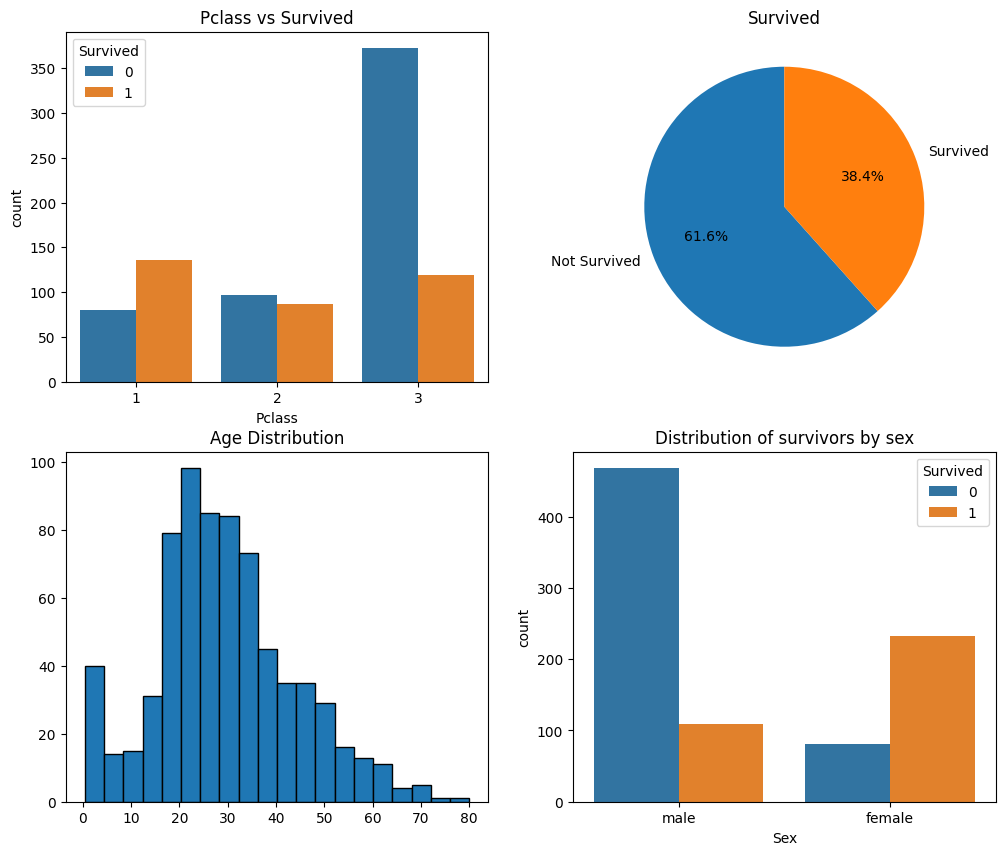

In [13]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Pclass vs Survived')
plt.subplot(2, 2, 2)
plt.pie(df['Survived'].value_counts(), labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survived')
plt.subplot(2, 2, 3)
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Distribution of survivors by sex')
plt.show()


Conclusion based on these plots: 

- First-class passengers had a significant survival advantage over lower-class passengers.
- Survival chances were low overall, with less than 40% of passengers making it out alive.
- Children had a higher survival rate compared to adults, suggesting priority in lifeboat evacuation.
- Gender played a critical role in survival—women had a much greater chance of survival than men.

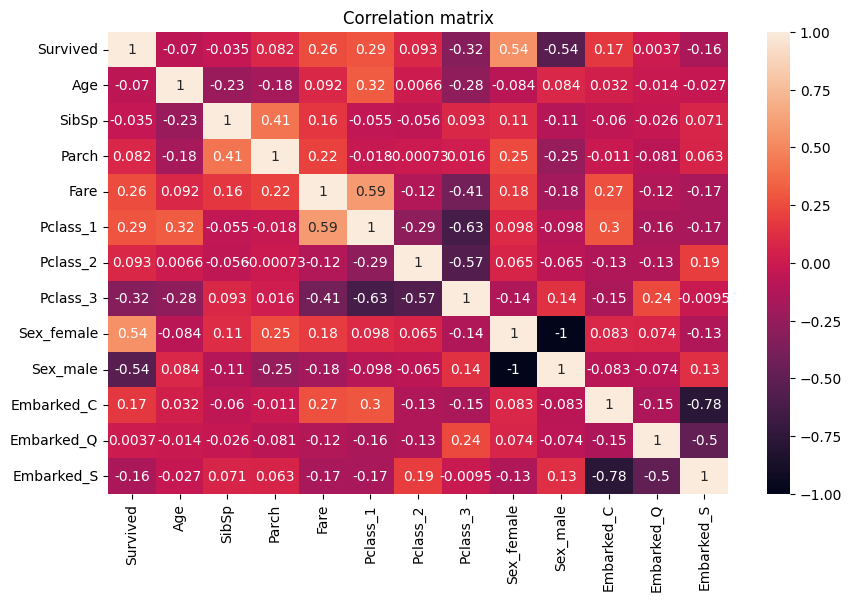

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(),annot=True)
plt.title('Correlation matrix')
plt.show()

Based on correlations, we should choose features like 'Sex_female' and 'Pclass_1' because they have strongest positive correlations with 'Survived'. At the same time, features such as 'Sex_male', 'Pclass_3' or 'Pclass_2' should be chosen by their strong negative correlation with 'Survived'. 

However, analyzing their correlation features like 'Sex_male' should be dropped because it have a high correlation with 'Sex_female' and other features have a low correlation with 'Survived'.

Finally, we only chose 'Sex_female', 'Pclass_3', 'Pclass_1', 'Fare' and 'Embarked_C'.

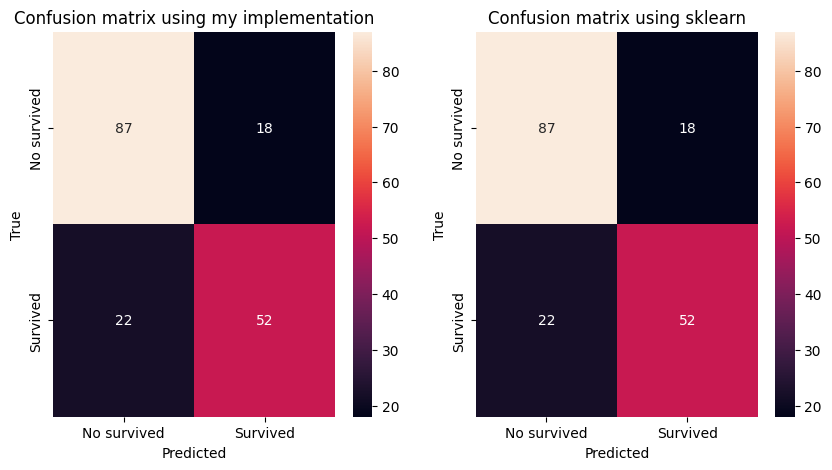

Accuracy using sklearn: 0.776536312849162
Accuracy using my implemention: 0.776536312849162
Classification report using sklern: 
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Classification report usign my implementation: 
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [15]:
# Select the most relevant features based on our study
features = ["Sex_female", "Pclass_3", "Pclass_1", "Fare", "Embarked_C"]

X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train['Survived'], test_size=0.2, random_state=42)

# We convert the target variable to binary, Logistic Regression only works with binary classification
y_train = (y_train >= 0).astype(int)
y_test = (y_test >= 0).astype(int)

# Sklearn implementation
model = LogisticRegression()
model.fit(X_train.values, y_train.values)
y_pred_sklearn = model.predict(X_test.values)

# My implementation
model = BinaryLogisticRegression()
model.fit(X_train.values, y_train.values)
y_pred = model.predict(X_test.values)

# Results...
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred),xticklabels={'No survived','Survived'},yticklabels={'No survived','Survived'}, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix using my implementation')
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn),xticklabels={'No survived','Survived'},yticklabels={'No survived','Survived'}, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix using sklearn')
plt.show()

print(f'Accuracy using sklearn: {accuracy_score(y_test, y_pred_sklearn)}')
print(f'Accuracy using my implemention: {accuracy_score(y_test, y_pred)}')
print(f'Classification report using sklern: \n{classification_report(y_test, y_pred_sklearn)}')
print(f'Classification report usign my implementation: \n{classification_report(y_test, y_pred)}')


Both implementations yield identical accuracy, confirming that my custom logistic regression implementation is correctly working and matching sklearn's performance. My implementation is as effective as Scikit-learn’s.
